0.0
0.02776204070051743
0.05193701016388164
0.0725005160220475
0.08949431696662373
0.10301819424653173
0.11322171542838212
0.12029604670697952
0.12446595170072251
0.1259820959598105
0.12511375772046257
0.12214202708083638
0.11735355803671019
0.1110349209374434
0.10346758710504504
0.09492356277436605
0.0856616763539793
0.0759245115806325
0.06593596991982263
0.055899438985566256
0.045996539478981004
0.036386418992981895
0.02720555257429717
0.018567992420512203
0.010565982261998043
0.0032708254363890315


<IPython.core.display.Javascript object>


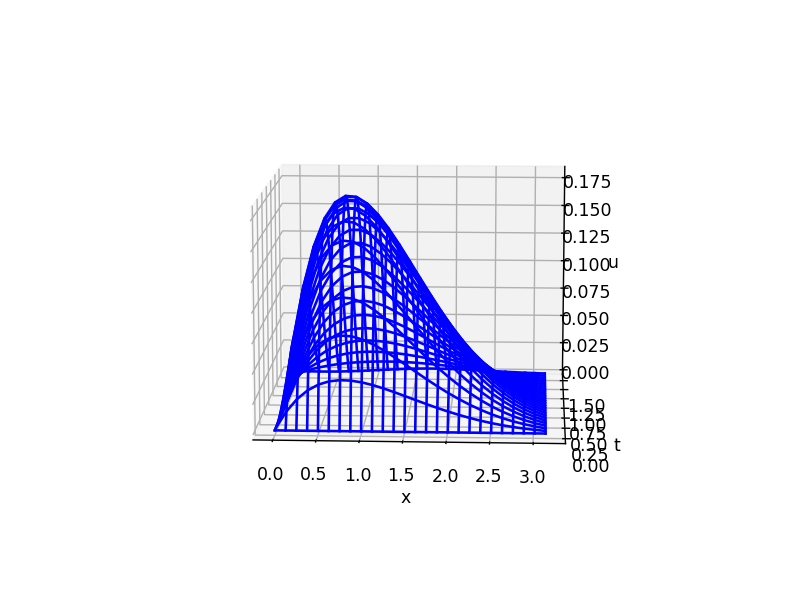

In [6]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt

# Initial dataS
a = 2
b = 1
c = 2
d = -3
N = 25
K = 25
L = math.pi
h = L / N
t = h / 2
T = t * K

first = (b/(h*h)) + (c/h)
second = (2/(t*t)) + (a/t) - ((2*b)/(h*h)) - (c/h) + d
div = (1/(t*t)) + (a/t)

u_mesh = np.zeros((N + 1, K + 1))  # Finite-difference mesh


def draw_u(u):
    x = [h * i for i in range(N + 1)] * (K + 1)

    y = np.zeros((N + 1) * (K + 1))
    i = 0
    j = 0
    while i < (N + 1) * (K + 1):
        y[i] = t * j
        i += 1
        if i % (N + 1) == 0:
            j += 1

    z = np.zeros((N + 1) * (K + 1))
    k = 0
    n = 0
    for i in range((N + 1) * (K + 1)):
        z[i] = u[n][k]
        n += 1
        if n % (N + 1) == 0:
            n = 0
            k += 1

    x2 = np.zeros((N + 1) * (K + 1))
    i = 0
    j = 0
    while i < (N + 1) * (K + 1):
        x2[i] = h * j
        i += 1
        if i % (K + 1) == 0:
            j += 1

    y2 = [t * i for i in range(K + 1)] * (N + 1)

    z2 = np.zeros((N + 1) * (K + 1))
    i = 0
    j = 0
    r = 0
    while r < (N + 1) * (K + 1):
        z2[r] = z[i * (N + 1) + j]
        r += 1
        i += 1
        if r % (K + 1) == 0:
            i = 0
            j += 1

    ax = plt.axes(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    for i in range(K + 1):
        ax.plot3D(x[(N + 1) * i:(N + 1) * (i + 1)], y[(N + 1) * i:(N + 1) * (i + 1)], z[(N + 1) * i:(N + 1) * (i + 1)],
                  'blue')
    for i in range(N + 1):
        ax.plot3D(x2[(K + 1) * i:(K + 1) * (i + 1)], y2[(K + 1) * i:(K + 1) * (i + 1)],
                  z2[(K + 1) * i:(K + 1) * (i + 1)], 'blue')
    plt.show()


def create_u(u):
    for j in range(1, N):  # Initial conditions
        u[j][0] = 0
        u[j][1] = u[j][0] + t*(2*math.exp(-j*h) * math.sin(j*h)) 

    for k in range(1, K):
        for j in range(1, N):
            u[j][k+1] = (u[j+1][k]*first + u[j][k]*second + ((u[j-1][k]*b)/(h*h)) - (u[j][k-1]/(t*t))) / div

    for k in range(K + 1):  # Boundary conditions
        u[0][k] = 0
        u[N][k] = 0
        
    for i in range(N + 1):
        print(u[int(N / 2)][i])

    #print(np.around(u, 3))
    draw_u(u)


create_u(u_mesh)